<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_%EB%B3%B5%EC%8A%B5/5_1_%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 불러오기

In [20]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()
#0 레드와인 1 화이트와인

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [21]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [22]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


#데이터 전처리

In [23]:
wine_input = wine[['alcohol','sugar','pH']].to_numpy()
wine_target = wine['class'].to_numpy()

In [24]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    wine_input, wine_target, test_size = 0.2, random_state = 42)

#결정 트리

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)

dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target), dt.score(test_scaled, test_target))

0.8454877814123533 0.8415384615384616


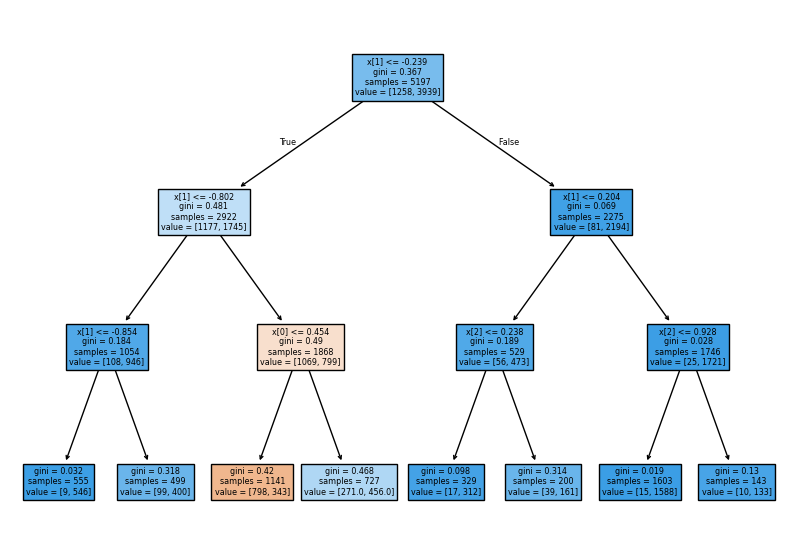

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plot_tree(dt, filled=True)
plt.show()

In [36]:
dt.feature_importances_ # 당도가 제일 중요

array([0.12345626, 0.86862934, 0.0079144 ])